<a href="https://colab.research.google.com/github/zekiyerdem/zekiyerdem/blob/main/Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [ ]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [ ]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [ ]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2018-1-1', end='2024-1-1')

In [ ]:
tickerDf = tickerDf[['Close']]

In [ ]:
#see your data
tickerDf.head()

,Close
Date,
2018-01-02 00:00:00-05:00,243.072281
2018-01-03 00:00:00-05:00,244.609726
2018-01-04 00:00:00-05:00,245.640701
2018-01-05 00:00:00-05:00,247.277634
2018-01-08 00:00:00-05:00,247.729797


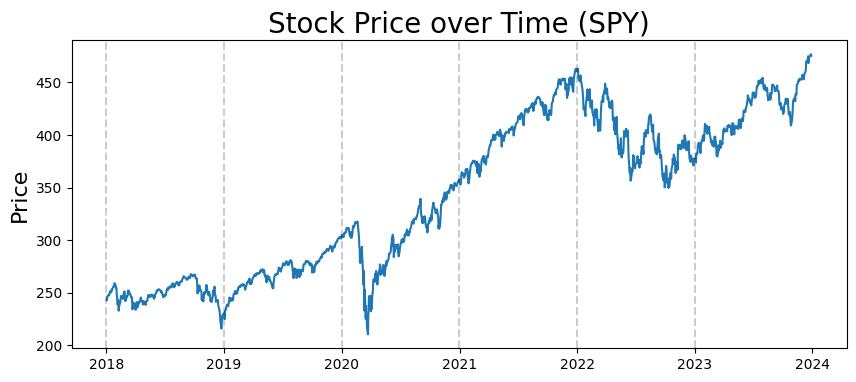

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2018,2024):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## **Stationarity: take first difference of this series**

In [ ]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [ ]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [ ]:
tickerDf.head()

,Close,FirstDifference
Date,,
2018-01-02 00:00:00-05:00,243.072281,1.537445
2018-01-03 00:00:00-05:00,244.609726,1.030975
2018-01-04 00:00:00-05:00,245.640701,1.636932
2018-01-05 00:00:00-05:00,247.277634,0.452164
2018-01-08 00:00:00-05:00,247.729797,0.560776


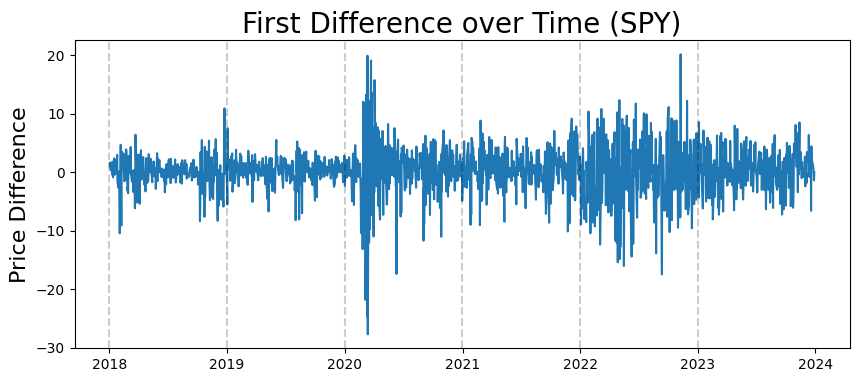

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2018,2024):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

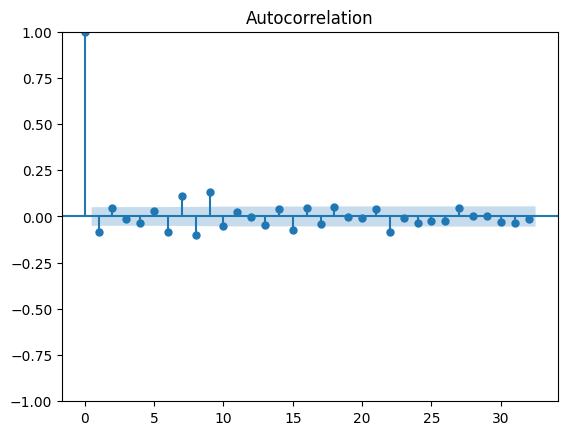

In [ ]:
acf_plot = plot_acf(tickerDf.FirstDifference)

# **ACF isn't that informative**

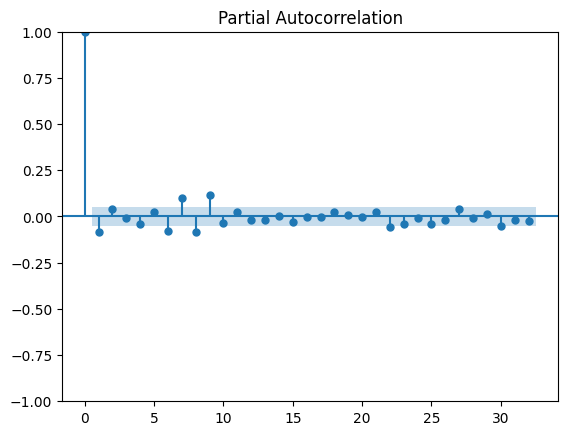

In [ ]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

# PACF also doesn't tell us **much**